In [1]:
import os
from os.path import exists

import anchor
import anchor.anchor_tabular

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

from sklearn.svm import SVC
from sklearn.base import BaseEstimator, ClassifierMixin

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, f1_score, recall_score
import time

from AnchorGeneration import *
from UtilsModel import *

In [2]:
data_path = "/Users/saranarteni/OneDrive - CNR/REXASI-PRO/T3.1/navground_code/simulation2/"
res_path = data_path+"resultsPSR_Safe/"
if not exists(res_path):
    os.mkdir(res_path)
results_anchorfile = "anchors-psr.csv"
feature_labels = ["SafetyMargin","Eta","Tau"]
true_output = "y_true"
#model_output = "y_pred"
cp_output = "y_conformal"
modelfilename = "PS_SVM_safe.sav" 

In [3]:
train = pd.read_csv(data_path+"train_ps.csv")
y_train = np.array(train[true_output])
#y_model_train = np.array(train[model_output])
y_cp_train = np.array(train[cp_output])
X_train = train.drop([true_output,cp_output],axis = 1)
X_train = np.array(X_train)

test = pd.read_csv(data_path+"test_ps.csv")
y_test = np.array(test[true_output])
#y_model_test = np.array(test[model_output])
y_cp_test = np.array(test[cp_output])
X_test = test.drop([true_output,cp_output],axis = 1)
X_test = np.array(X_test)

# Anchors from ScalableSVM

In [4]:
sc_svm = joblib.load(data_path+modelfilename)

In [5]:
sc_svm.get_params()

{'alpha': array([0.49992162, 0.50003417, 0.49988513, ..., 0.50007678, 0.49997215,
        0.49994338]),
 'b': array([-0.05929787]),
 'b_eps': 0.21856089114097121,
 'eta': 0.3,
 'kernel': 'polynomial',
 'param': 3}

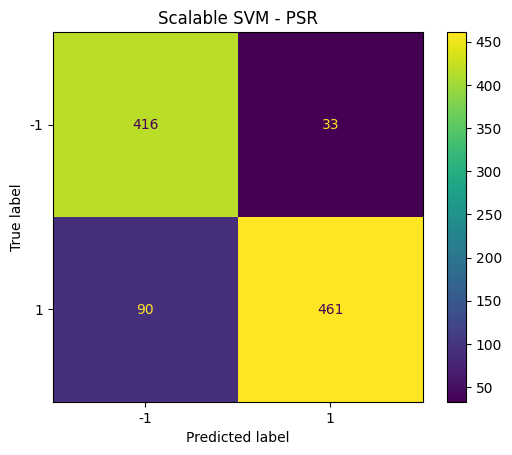

ACC = 0.877, F1 = 0.8822966507177034, PPV = 0.9331983805668016, NPV = 0.8221343873517787, TPR = 0.8366606170598911, TNR = 0.9265033407572383

TP = 461, FP = 33, TN = 416, FN = 90


In [7]:
EvaluateModel(sc_svm, X_test, y_test, "Scalable SVM - PSR")

In [8]:
anchors_ssvm = GenerateAnchorRules(sc_svm, X_train, X_test, y_cp_test, y_test, [i[0] for i in list(enumerate(X_test))], feature_labels, list(sc_svm.classes_), precision_threshold = 0.5, filepath = res_path+results_anchorfile)

Elapsed time [sec] - Anchors for 1000 test points: 1941.6818342208862
